### 安装配置环境

In [1]:
!pip install numpy pandas matplotlib requests tqdm opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 图像采集

#### 导入工具包

In [1]:
import os

import time

import requests

import urllib3
urllib3.disable_warnings()

# 进度条库
from tqdm import tqdm

import os

#### HTTP请求参数

In [3]:
cookies = {
'BDqhfp': '%E7%8B%97%E7%8B%97%26%26NaN-1undefined%26%2618880%26%2621',
'BIDUPSID': '06338E0BE23C6ADB52165ACEB972355B',
'PSTM': '1646905430',
'BAIDUID': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDORZ': 'B490B5EBF6F3CD402E515D22BCDA1598',
'H_PS_PSSID': '35836_35105_31254_36024_36005_34584_36142_36120_36032_35993_35984_35319_26350_35723_22160_36061',
'BDSFRCVID': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'BDSFRCVID_BFESS': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF_BFESS': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'indexPageSugList': '%5B%22%E7%8B%97%E7%8B%97%22%5D',
'cleanHistoryStatus': '0',
'BAIDUID_BFESS': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDRCVFR[dG2JNJb_ajR]': 'mk3SLVN4HKm',
'BDRCVFR[-pGxjrCMryR]': 'mk3SLVN4HKm',
'ab_sr': '1.0.1_Y2YxZDkwMWZkMmY2MzA4MGU0OTNhMzVlNTcwMmM2MWE4YWU4OTc1ZjZmZDM2N2RjYmVkMzFiY2NjNWM4Nzk4NzBlZTliYWU0ZTAyODkzNDA3YzNiMTVjMTllMzQ0MGJlZjAwYzk5MDdjNWM0MzJmMDdhOWNhYTZhMjIwODc5MDMxN2QyMmE1YTFmN2QyY2M1M2VmZDkzMjMyOThiYmNhZA==',
'delPer': '0',
'PSINO': '2',
'BA_HECTOR': '8h24a024042g05alup1h3g0aq0q',
}

headers = {
'Connection': 'keep-alive',
'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
'Accept': 'text/plain, */*; q=0.01',
'X-Requested-With': 'XMLHttpRequest',
'sec-ch-ua-mobile': '?0',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36',
'sec-ch-ua-platform': '"macOS"',
'Sec-Fetch-Site': 'same-origin',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Dest': 'empty',
'Referer': 'https://image.baidu.com/search/index?tn=baiduimage&ipn=r&ct=201326592&cl=2&lm=-1&st=-1&fm=result&fr=&sf=1&fmq=1647837998851_R&pv=&ic=&nc=1&z=&hd=&latest=&copyright=&se=1&showtab=0&fb=0&width=&height=&face=0&istype=2&dyTabStr=MCwzLDIsNiwxLDUsNCw4LDcsOQ%3D%3D&ie=utf-8&sid=&word=%E7%8B%97%E7%8B%97',
'Accept-Language': 'zh-CN,zh;q=0.9',
}

#### 指定关键词

In [5]:
# 关键词
keyword = '芒果'

# 拟爬取图像个数
DOWNLOAD_NUM = 100

#### 爬取并保存图像文件至本地

In [7]:
def craw_single_class(keyword, DOWNLOAD_NUM = 200):
    if os.path.exists('dataset/'+keyword):
        print('文件夹 dataset/{} 已存在，之后直接将爬取到的图片保存至该文件夹中'.format(keyword))
    else:
        os.makedirs('dataset/{}'.format(keyword))
        print('新建文件夹：dataset/{}'.format(keyword))
    count = 1
    
    with tqdm(total=DOWNLOAD_NUM, position=0, leave=True) as pbar:
        
        # 爬取第几张
        num = 0

        # 是否继续爬取
        FLAG = True

        while FLAG:

            page = 30 * count

            params = (
                ('tn', 'resultjson_com'),
                ('logid', '12508239107856075440'),
                ('ipn', 'rj'),
                ('ct', '201326592'),
                ('is', ''),
                ('fp', 'result'),
                ('fr', ''),
                ('word', f'{keyword}'),
                ('queryWord', f'{keyword}'),
                ('cl', '2'),
                ('lm', '-1'),
                ('ie', 'utf-8'),
                ('oe', 'utf-8'),
                ('adpicid', ''),
                ('st', '-1'),
                ('z', ''),
                ('ic', ''),
                ('hd', ''),
                ('latest', ''),
                ('copyright', ''),
                ('s', ''),
                ('se', ''),
                ('tab', ''),
                ('width', ''),
                ('height', ''),
                ('face', '0'),
                ('istype', '2'),
                ('qc', ''),
                ('nc', '1'),
                ('expermode', ''),
                ('nojc', ''),
                ('isAsync', ''),
                ('pn', f'{page}'),
                ('rn', '30'),
                ('gsm', '1e'),
                ('1647838001666', ''),
            )

            response = requests.get('https://image.baidu.com/search/acjson', headers=headers, params=params, cookies=cookies)
            if response.status_code == 200:
                try:
                    json_data = response.json().get("data")

                    if json_data:
                        for x in json_data:
                            type = x.get("type")
                            if type not in ["gif"]:
                                img = x.get("thumbURL")
                                fromPageTitleEnc = x.get("fromPageTitleEnc")
                                try:
                                    resp = requests.get(url=img, verify=False)
                                    time.sleep(1)
                                    # print(f"链接 {img}")

                                    # 保存文件名
                                    # file_save_path = f'dataset/{keyword}/{num}-{fromPageTitleEnc}.{type}'
                                    file_save_path = f'dataset/{keyword}/{num}.{type}'
                                    with open(file_save_path, 'wb') as f:                                    
                                        f.write(resp.content)
                                        f.flush()
                                        # print('第 {} 张图像 {} 爬取完成'.format(num, fromPageTitleEnc))
                                        num += 1
                                        pbar.update(1) # 进度条更新

                                    # 爬取数量达到要求
                                    if num > DOWNLOAD_NUM:
                                        FLAG = False
                                        print('{} 张图像爬取完毕'.format(num))
                                        break

                                except Exception:
                                    pass
                except:
                    pass
            else:
                break

            count += 1

In [8]:
class_list = ['黄瓜','南瓜','冬瓜','木瓜','苦瓜','丝瓜','窝瓜','甜瓜','香瓜','白兰瓜','黄金瓜','西葫芦','人参果','羊角蜜','佛手瓜','伊丽莎白瓜']

In [10]:
# for each in class_list:
#     craw_single_class(each, DOWNLOAD_NUM = 200)

### 删除多余文件

In [11]:
import os
import cv2
from tqdm import tqdm

In [12]:
# 下载测试数据集压缩包
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/dataset_delete_test.zip

--2023-01-17 22:20:37--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/dataset_delete_test.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 29954078 (29M) [application/zip]
正在保存至: “dataset_delete_test.zip”

dataset_delete_test 100%[===================>]  28.57M  29.4MB/s    用时 1.0s    

2023-01-17 22:20:38 (29.4 MB/s) - 已保存 “dataset_delete_test.zip” [29954078/29954078])



In [13]:
# 解压
!unzip dataset_delete_test.zip >> /dev/null

#### 查看待删除的多余文件

In [14]:
!find . -iname '__MACOSX'

./__MACOSX


In [15]:
!find . -iname '.DS_Store'

./dataset_delete_test/芒果/.DS_Store
./dataset_delete_test/.DS_Store
./dataset_delete_test/猕猴桃/.DS_Store


In [16]:
!find . -iname '.ipynb_checkpoints'

./.ipynb_checkpoints
./dataset_delete_test/西葫芦/.ipynb_checkpoints
./__MACOSX/dataset_delete_test/西葫芦/.ipynb_checkpoints


In [17]:
'.DS_Store' in os.listdir('dataset_delete_test/芒果')

True

#### 删除多余文件

In [18]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done

In [19]:
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done

In [20]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

#### 验证多余文件已删除

In [21]:
!find . -iname '__MACOSX'

In [22]:
!find . -iname '.DS_Store'

In [23]:
!find . -iname '.ipynb_checkpoints'

#### 删除gif格式的图像文件

In [24]:
dataset_path = 'dataset_delete_test'

In [25]:
for fruit in tqdm(os.listdir(dataset_path)):
    for file in os.listdir(os.path.join(dataset_path, fruit)):
        file_path = os.path.join(dataset_path, fruit, file)
        img = cv2.imread(file_path)
        if img is None:
            print(file_path, '读取错误，删除')
            os.remove(file_path)

 67%|██████▋   | 2/3 [00:02<00:01,  1.12s/it]

dataset_delete_test/西葫芦/112.jpg 读取错误，删除


100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


#### 删除非三通道的图像

In [26]:
import numpy as np
from PIL import Image
for fruit in tqdm(os.listdir(dataset_path)):
    for file in os.listdir(os.path.join(dataset_path, fruit)):
        file_path = os.path.join(dataset_path, fruit, file)
        img = np.array(Image.open(file_path))
        try:
            channel = img.shape[2]
            if channel != 3:
                print(file_path, '非三通道，删除')
                os.remove(file_path)
        except:
            print(file_path, '非三通道，删除')
            os.remove(file_path)

  0%|          | 0/3 [00:00<?, ?it/s]

dataset_delete_test/芒果/164.png 非三通道，删除
dataset_delete_test/芒果/64.png 非三通道，删除
dataset_delete_test/芒果/171.png 非三通道，删除
dataset_delete_test/芒果/20.png 非三通道，删除
dataset_delete_test/芒果/33.png 非三通道，删除
dataset_delete_test/芒果/180.png 非三通道，删除
dataset_delete_test/芒果/156.png 非三通道，删除


 33%|███▎      | 1/3 [00:01<00:02,  1.11s/it]

dataset_delete_test/芒果/191.png 非三通道，删除
dataset_delete_test/猕猴桃/165.png 非三通道，删除
dataset_delete_test/猕猴桃/173.png 非三通道，删除
dataset_delete_test/猕猴桃/129.png 非三通道，删除
dataset_delete_test/猕猴桃/120.jpg 非三通道，删除
dataset_delete_test/猕猴桃/132.png 非三通道，删除
dataset_delete_test/猕猴桃/43.png 非三通道，删除
dataset_delete_test/猕猴桃/55.jpg 非三通道，删除
dataset_delete_test/猕猴桃/168.jpg 非三通道，删除


 67%|██████▋   | 2/3 [00:02<00:01,  1.13s/it]

dataset_delete_test/猕猴桃/93.png 非三通道，删除
dataset_delete_test/猕猴桃/51.jpg 非三通道，删除
dataset_delete_test/西葫芦/67.jpg 非三通道，删除
dataset_delete_test/西葫芦/27.png 非三通道，删除
dataset_delete_test/西葫芦/42.png 非三通道，删除


100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


#### 再次删除多余的`.ipynb_checkpoints`目录

In [27]:
!find . -iname '.ipynb_checkpoints'

./.ipynb_checkpoints


In [28]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

In [29]:
!find . -iname '.ipynb_checkpoints'

### 下载Demo数据集

#### melon17瓜果图像分类数据集

In [30]:
# 下载压缩包
# 如报错 Unable to establish SSL connection. 重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/melon17/melon17_full.zip

--2023-01-17 22:26:08--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/melon17/melon17_full.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 131303074 (125M) [application/zip]
正在保存至: “melon17_full.zip”

melon17_full.zip    100%[===================>] 125.22M  52.3MB/s    用时 2.4s    

2023-01-17 22:26:11 (52.3 MB/s) - 已保存 “melon17_full.zip” [131303074/131303074])



In [31]:
# 解压
!unzip melon17_full.zip >> /dev/null

In [36]:
# 删除文件
!rm -rf melon17_full.zip

#### fruit81水果图像分类数据集

In [32]:
# 下载压缩包
# 如报错 Unable to establish SSL connection. 重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip

--2023-01-17 22:26:35--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 724936499 (691M) [application/zip]
正在保存至: “fruit81_full.zip”

fruit81_full.zip    100%[===================>] 691.35M  59.3MB/s    用时 12s     

2023-01-17 22:26:48 (57.8 MB/s) - 已保存 “fruit81_full.zip” [724936499/724936499])



In [33]:
# 解压
!unzip fruit81_full.zip >> /dev/null

In [34]:
# 删除文件
!rm -rf fruit81_full.zip

In [35]:
# 删除文件夹
!rm -rf fruit81_split

### 统计图像尺寸、比例分布

In [37]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

#### 指定数据集路径

In [38]:
# 指定数据集路径
dataset_path = 'fruit81_full'
os.chdir(dataset_path)
os.listdir()

['莲雾',
 '黄桃',
 '圣女果',
 '芒果',
 '菠萝',
 '石榴',
 '桑葚',
 '沃柑',
 '山竹',
 '血橙',
 '人参果',
 '羊角蜜',
 '菠萝莓',
 '猕猴桃',
 '哈密瓜',
 '山楂',
 '黑莓',
 '沙棘',
 '柚子',
 '脐橙',
 '杨桃',
 '甘蔗',
 '车厘子',
 '杨梅',
 '蛇皮果',
 '西柚',
 '百香果',
 '牛油果',
 '无花果',
 '草莓',
 '白兰瓜',
 '椰子',
 '西瓜',
 '蓝莓',
 '桂圆',
 '佛手瓜',
 '葡萄-红',
 '毛丹',
 '酸角',
 '番石榴-红',
 '荔枝',
 '香橼',
 '香蕉',
 '水蜜桃',
 '柠檬',
 '甜瓜-白',
 '胡萝卜',
 '橘子',
 '白心火龙果',
 '梨',
 '蟠桃',
 '甜瓜-伊丽莎白',
 '葡萄-白',
 '杏',
 '砂糖橘',
 '芦柑',
 '樱桃',
 '枣',
 '榴莲',
 '粑粑柑',
 '枇杷',
 '西红柿',
 '甜瓜-金',
 '柿子',
 '菠萝蜜',
 '甜瓜-绿',
 '羊奶果',
 '油桃',
 '树莓',
 '西梅',
 '红心火龙果',
 '沙果',
 '青苹果',
 '番石榴-百',
 '白萝卜',
 '李子',
 '金桔',
 '红苹果',
 '青柠',
 '木瓜',
 '腰果']

In [39]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|██████████| 81/81 [01:36<00:00,  1.19s/it]


In [40]:
df

,类别,文件名,图像宽,图像高
0,莲雾,63.jpg,500.0,281.0
1,莲雾,189.jpg,699.0,442.0
2,莲雾,77.jpg,375.0,500.0
3,莲雾,162.jpg,500.0,500.0
4,莲雾,176.jpg,550.0,324.0
...,...,...,...,...
14428,腰果,147.jpg,500.0,372.0
14429,腰果,52.jpg,500.0,500.0
14430,腰果,46.jpg,500.0,500.0
14431,腰果,190.jpg,600.0,400.0


#### 可视化图像尺寸分布

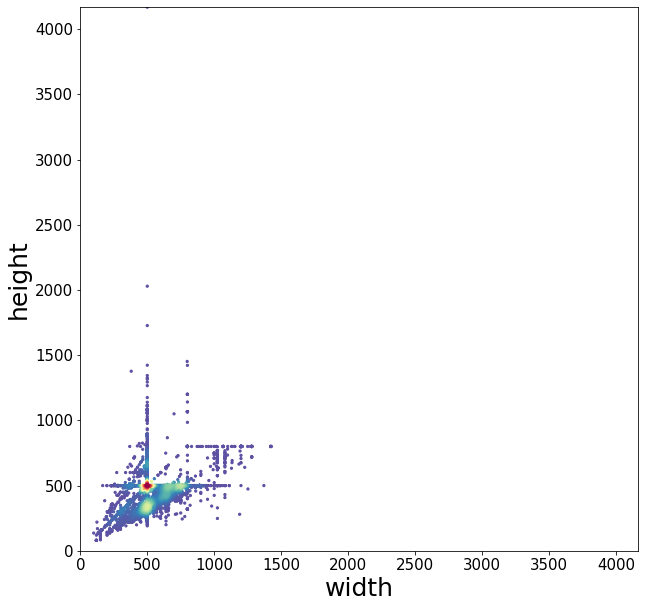

In [41]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

### 划分训练集和测试集

In [42]:
import os
import shutil
import random
import pandas as pd

#### 获得所有类别名称

In [43]:
# 指定数据集路径
dataset_path = 'fruit81_full'

In [44]:
dataset_name = dataset_path.split('_')[0]
print('数据集', dataset_name)

数据集 fruit81


In [45]:
classes = os.listdir(dataset_path)

In [46]:
len(classes)

81

In [47]:
classes

['莲雾',
 '黄桃',
 '圣女果',
 '芒果',
 '菠萝',
 '石榴',
 '桑葚',
 '沃柑',
 '山竹',
 '血橙',
 '人参果',
 '羊角蜜',
 '菠萝莓',
 '猕猴桃',
 '哈密瓜',
 '山楂',
 '黑莓',
 '沙棘',
 '柚子',
 '脐橙',
 '杨桃',
 '甘蔗',
 '车厘子',
 '杨梅',
 '蛇皮果',
 '西柚',
 '百香果',
 '牛油果',
 '无花果',
 '草莓',
 '白兰瓜',
 '椰子',
 '西瓜',
 '蓝莓',
 '桂圆',
 '佛手瓜',
 '葡萄-红',
 '毛丹',
 '酸角',
 '番石榴-红',
 '荔枝',
 '香橼',
 '香蕉',
 '水蜜桃',
 '柠檬',
 '甜瓜-白',
 '胡萝卜',
 '橘子',
 '白心火龙果',
 '梨',
 '蟠桃',
 '甜瓜-伊丽莎白',
 '葡萄-白',
 '杏',
 '砂糖橘',
 '芦柑',
 '樱桃',
 '枣',
 '榴莲',
 '粑粑柑',
 '枇杷',
 '西红柿',
 '甜瓜-金',
 '柿子',
 '菠萝蜜',
 '甜瓜-绿',
 '羊奶果',
 '油桃',
 '树莓',
 '西梅',
 '红心火龙果',
 '沙果',
 '青苹果',
 '番石榴-百',
 '白萝卜',
 '李子',
 '金桔',
 '红苹果',
 '青柠',
 '木瓜',
 '腰果']

#### 创建训练集文件夹和测试集文件夹

In [48]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

# 在 train 和 test 文件夹中创建各类别子文件夹
for fruit in classes:
    os.mkdir(os.path.join(dataset_path, 'train', fruit))
    os.mkdir(os.path.join(dataset_path, 'val', fruit))

#### 划分训练集、测试集，移动文件

In [49]:
test_frac = 0.2  # 测试集比例
random.seed(123) # 随机数种子，便于复现

In [50]:
df = pd.DataFrame()

print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))

for fruit in classes: # 遍历每个类别

    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, fruit)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱

    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', fruit, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', fruit, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    shutil.rmtree(old_dir) # 删除文件夹
    
    # 工整地输出每一类别的数据个数
    print('{:^18} {:^18} {:^18}'.format(fruit, len(trainset_images), len(testset_images)))
    
    # 保存到表格中
    df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset']
df.to_csv('数据量统计.csv', index=False)

        类别              训练集数据个数            测试集数据个数      
        莲雾                156                 39        
        黄桃                155                 38        
       圣女果                158                 39        
        芒果                139                 34        
        菠萝                158                 39        
        石榴                153                 38        
        桑葚                156                 39        
        沃柑                159                 39        
        山竹                152                 38        
        血橙                150                 37        
       人参果                146                 36        
       羊角蜜                157                 39        
       菠萝莓                 91                 22        
       猕猴桃                158                 39        
       哈密瓜                157                 39        
        山楂                159                 39        
        黑莓                150  

In [51]:
df

,class,trainset,testset,total
0,莲雾,156.0,39.0,195.0
1,黄桃,155.0,38.0,193.0
2,圣女果,158.0,39.0,197.0
3,芒果,139.0,34.0,173.0
4,菠萝,158.0,39.0,197.0
...,...,...,...,...
76,金桔,145.0,36.0,181.0
77,红苹果,142.0,35.0,177.0
78,青柠,119.0,29.0,148.0
79,木瓜,156.0,38.0,194.0


#### 查看文件目录结构

In [52]:
!sudo snap install tree

tree 1.8.0+pkg-3fd6 已从 林博仁(Buo-ren, Lin) (brlin) 安装      \.0ns


In [53]:
!tree fruit81_split -L 2

locales-launch: Data of zh_CN locale not found, generating, please wait...
fruit81_split
├── train
│   ├── 粑粑柑
│   ├── 白兰瓜
│   ├── 白萝卜
│   ├── 白心火龙果
│   ├── 百香果
│   ├── 菠萝
│   ├── 菠萝莓
│   ├── 菠萝蜜
│   ├── 草莓
│   ├── 车厘子
│   ├── 番石榴-百
│   ├── 番石榴-红
│   ├── 佛手瓜
│   ├── 甘蔗
│   ├── 桂圆
│   ├── 哈密瓜
│   ├── 黑莓
│   ├── 红苹果
│   ├── 红心火龙果
│   ├── 胡萝卜
│   ├── 黄桃
│   ├── 金桔
│   ├── 橘子
│   ├── 蓝莓
│   ├── 梨
│   ├── 李子
│   ├── 荔枝
│   ├── 莲雾
│   ├── 榴莲
│   ├── 芦柑
│   ├── 芒果
│   ├── 毛丹
│   ├── 猕猴桃
│   ├── 木瓜
│   ├── 柠檬
│   ├── 牛油果
│   ├── 蟠桃
│   ├── 枇杷
│   ├── 葡萄-白
│   ├── 葡萄-红
│   ├── 脐橙
│   ├── 青柠
│   ├── 青苹果
│   ├── 人参果
│   ├── 桑葚
│   ├── 沙果
│   ├── 沙棘
│   ├── 砂糖橘
│   ├── 山楂
│   ├── 山竹
│   ├── 蛇皮果
│   ├── 圣女果
│   ├── 石榴
│   ├── 柿子
│   ├── 树莓
│   ├── 水蜜桃
│   ├── 酸角
│   ├── 甜瓜-白
│   ├── 甜瓜-金
│   ├── 甜瓜-绿
│   ├── 甜瓜-伊丽莎白
│   ├── 沃柑
│   ├── 无花果
│   ├── 西瓜
│   ├── 西红柿
│   ├── 西梅
│   ├── 西柚
│   ├── 香蕉
│   ├── 香橼
│   ├── 杏
│   ├── 血橙
│   ├── 杨梅
│   ├── 杨桃
│   ├── 羊角蜜
│   ├── 羊奶果
│   ├── 腰果
│   ├── 椰子
│   ├─

### 可视化文件夹中的图像

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm

#### 指定要可视化图像的文件夹

In [56]:
folder_path = 'fruit81_split/train/芒果'

In [58]:
# 可视化图像的个数
N = 36

In [59]:
# n 行 n 列
n = math.floor(np.sqrt(N))
n

6

#### 读取文件夹中的所有图像

In [60]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

In [61]:
len(images)

36

#### 画图

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


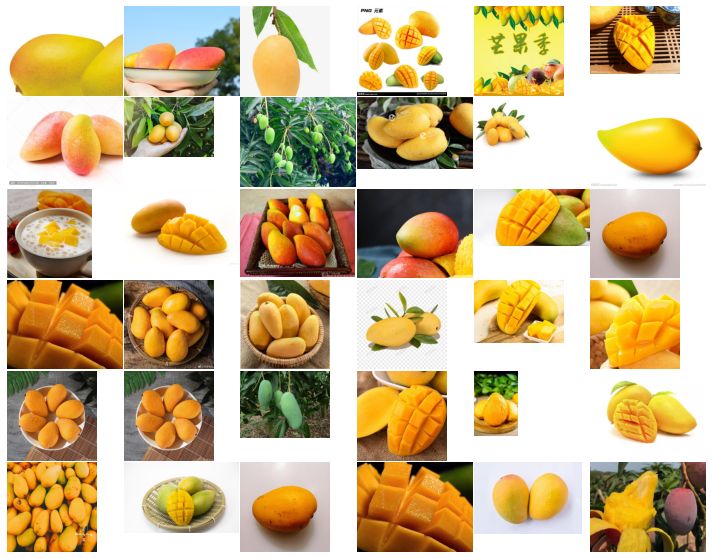

In [62]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

### 图像分类数据集探索统计

#### 各类别数据个数柱状图

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 设置中文字体

In [64]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 运行完毕后重启 kernel，再从头运行一次
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

--2023-01-17 22:38:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.8MB/s    用时 0.4s    

2023-01-17 22:38:56 (21.8 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



In [4]:
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

#### 导入数据集统计表格

In [5]:
df = pd.read_csv('数据量统计.csv')

In [6]:
df.shape

(81, 4)

In [7]:
df

,class,trainset,testset,total
0,莲雾,156.0,39.0,195.0
1,黄桃,155.0,38.0,193.0
2,圣女果,158.0,39.0,197.0
3,芒果,139.0,34.0,173.0
4,菠萝,158.0,39.0,197.0
...,...,...,...,...
76,金桔,145.0,36.0,181.0
77,红苹果,142.0,35.0,177.0
78,青柠,119.0,29.0,148.0
79,木瓜,156.0,38.0,194.0


#### 图像数量柱状图可视化

In [8]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [9]:
df = df.sort_values(by=feature, ascending=False)

In [10]:
df.head()

,class,trainset,testset,total
80,腰果,160.0,40.0,200.0
74,白萝卜,160.0,39.0,199.0
67,油桃,160.0,39.0,199.0
64,菠萝蜜,160.0,39.0,199.0
36,葡萄-红,160.0,39.0,199.0


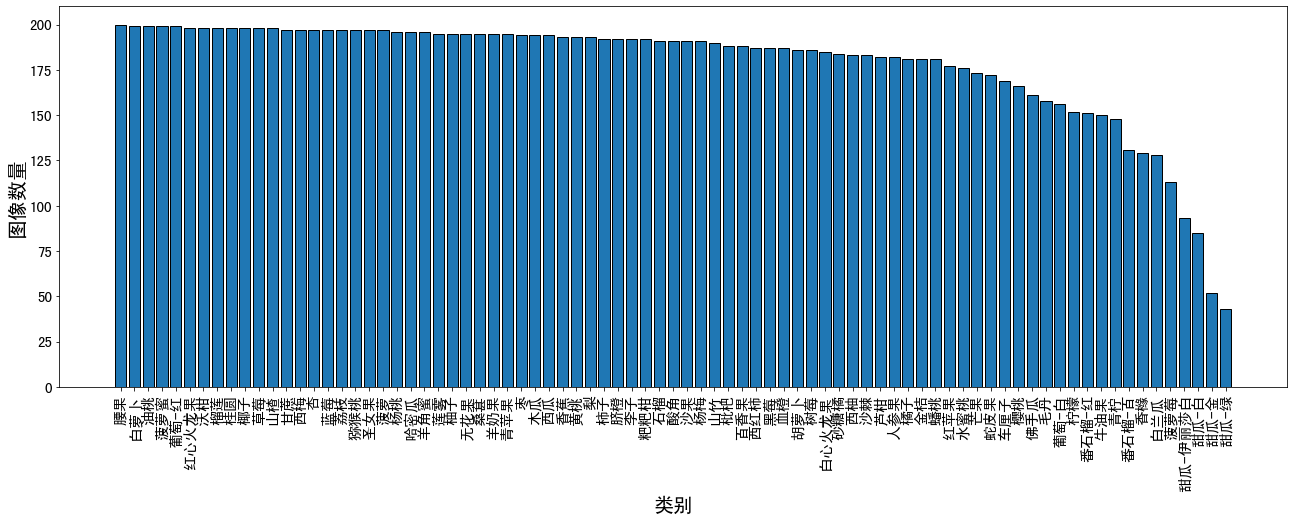

In [11]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()

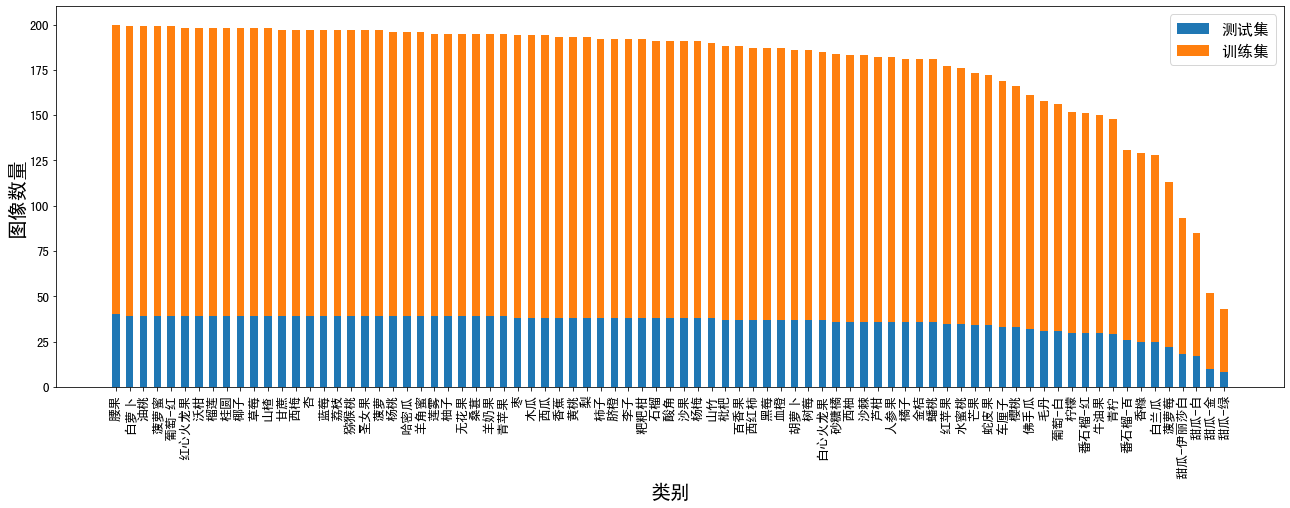

In [12]:
plt.figure(figsize=(22, 7))
x = df['class']
y1 = df['testset']
y2 = df['trainset']

width = 0.55 # 柱状图宽度

plt.xticks(rotation=90) # 横轴文字旋转

plt.bar(x, y1, width, label='测试集')
plt.bar(x, y2, width, label='训练集', bottom=y1)


plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)
plt.tick_params(labelsize=13) # 设置坐标文字大小

plt.legend(fontsize=16) # 图例

# 保存为高清的 pdf 文件
plt.savefig('各类别图像数量.pdf', dpi=120, bbox_inches='tight')

plt.show()